In [15]:
#%install_ext http://raw.github.com/azjps/ipython-asymptote/master/asymptote.py
%install_ext https://raw.githubusercontent.com/jrjohansson/ipython-asymptote/master/asymptote.py
%load_ext asymptote
%install_ext https://raw.github.com/PBrockmann/ipython-ferretmagic/master/ferretmagic.py

Installed asymptote.py. To use it, type:
  %load_ext asymptote
The asymptote extension is already loaded. To reload it, use:
  %reload_ext asymptote
Installed ferretmagic.py. To use it, type:
  %load_ext ferretmagic


/home/lucien/anaconda3/lib/python3.5/site-packages/IPython/core/magics/extension.py:47: UserWarning: %install_ext` is deprecated, please distribute your extension as a python package.
  "as a python package.", UserWarning)


b''


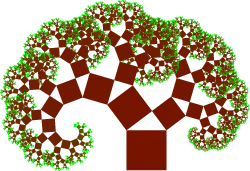

In [7]:
%%asy
size(250);

real a=3;
real b=4;
real c=hypot(a,b);

transform ta=shift(c,c)*rotate(-aCos(a/c))*scale(a/c)*shift(-c);
transform tb=shift(0,c)*rotate(aCos(b/c))*scale(b/c);

picture Pythagorean(int n) {
  picture pic;
  fill(pic,scale(c)*unitsquare,1/(n+1)*green+n/(n+1)*brown);
  if(n == 0) return pic;
  picture branch=Pythagorean(--n);
  add(pic,ta*branch);
  add(pic,tb*branch);
  return pic;
}

add(Pythagorean(12));

In [16]:
import mathlink

ImportError: No module named 'mathlink'

b''


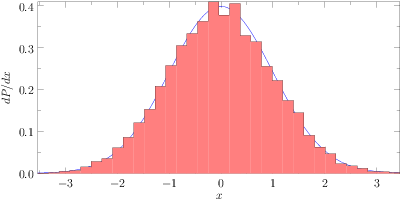

In [14]:
%%asy
import graph;
import stats;

size(400,200,IgnoreAspect);

int n= 10000;
real[] a=new real[n];
for(int i=0; i < n; ++i) a[i]=Gaussrand();

draw(graph(Gaussian,min(a),max(a)),blue);

// Optionally calculate "optimal" number of bins a la Shimazaki and Shinomoto.
int N=bins(a);

histogram(a,min(a),max(a),N,normalize=true,low=0,lightred,black,bars=false);

xaxis("$x$",BottomTop,LeftTicks);
yaxis("$dP/dx$",LeftRight,RightTicks(trailingzero));
